In [1]:
# Import modules
import numpy as np
import pandas as pd
import json
import requests

import matplotlib.pyplot as plt

In [3]:
baseurl = 'https://api.fda.gov/device/event.json?'

apikey = ''
with open('apikey.txt', 'r') as myfile:
    apikey = myfile.read().replace('\n', '')
    
query = 'count=date_received'
q = baseurl + 'api_key=' + apikey + '&' + query

In [5]:
dq = requests.get(q)
# dq1.json()['results']
data = json.loads(dq.text)['results']

In [56]:
df = pd.DataFrame(data)
CS = np.cumsum(df['count'].values)
df['cumsum'] = CS
df['time'] =  pd.to_datetime(df['time'], format='%Y%m%d')

df_agg = df.groupby(df['time'].map(lambda x: x.year)).agg({'cumsum': 'sum', 'count' : 'sum'})
# df_agg.reset_index()

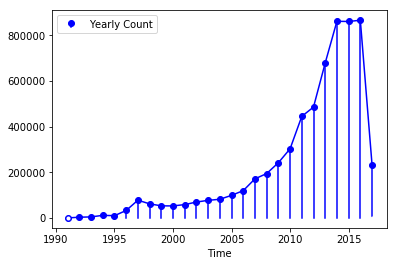

In [90]:
#%matplotlib inline
# df_agg.plot(x= df_agg.index, y = 'count', kind = 'line')
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(df_agg.index, df_agg['count'], 'b')
p1 = ax.stem(df_agg.index, df_agg['count'], linefmt='b-', markerfmt='bo', basefmt='w.', label = 'Yearly Count')
ax.set_xlabel('Time')
#ax.set_ylabel('Yearly Count')
ax.set_label('Yearly Count')
ax.legend(handles = [p1])
plt.savefig('YearlyCount.pdf')

## Similar but for device types

In [2]:
baseurl = 'https://api.fda.gov/device/event.json?'

apikey = ''
with open('apikey.txt', 'r') as myfile:
    apikey = myfile.read().replace('\n', '')
    
query = 'count=device_name'
q = baseurl + 'api_key=' + apikey + '&' + query

dq = requests.get(q)
# dq1.json()['results']
data = json.loads(dq.text)['results']

In [3]:
list_device_names = ["pump",
                    "sensor",
                    "prosthesis",
                    "defibrilator",
                    "pacemaker",
                    "catheter",
                    "electrode",
                    #"wearable",
                     "stent",
                     "ray",
                     "ventilator",
                     "bed",
                     "implant",
                     "lens",
                     #"mds" # https://www.cancer.org/cancer/myelodysplastic-syndrome/about/what-is-mds.html
                     "dialysis",
                     "graft",
                    ]

In [21]:
df = pd.DataFrame(data)
df_filt = df.loc[df['term'].isin(list_device_names)]
df_filt

,count,term
0,1023660,pump
6,539941,sensor
10,415040,prosthesis
23,313532,pacemaker
38,184977,catheter
44,168649,electrode
61,123634,stent
67,111515,ray
79,90360,ventilator
81,85537,implant


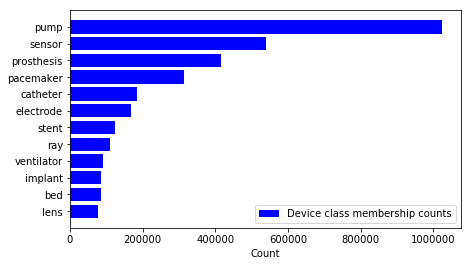

In [19]:
# %matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(7,4))
y_pos = np.arange(len(df_filt['term'].values))

ax.barh(y_pos, df_filt['count'].values, align='center',
        color='blue', label = 'Device class membership counts')

ax.set_xlabel('Count')
ax.set_yticks(y_pos)
ax.set_yticklabels(df_filt['term'])
ax.invert_yaxis()
# ax.set_ylabel('Yearly Count')
# ax.set_label('Device generic name')
ax.legend()

plt.savefig('name_count.pdf')